# Mesa ABM of the Keep Threshold Relay

### Simulation notes and instructions

Notes:
* Nodes are created simulataneously using the Mesa SimultaneousActivation scheduler
* The nodes go through a bootstrap phase based on Antonio's diagram. They can only form groups if they are in the mainloop forked state.
* Relay requests are currently bernoulli trials
* Singature events are modeled by default as asynchronous with a step delay to mimick the block delay

Instructions:
1. Change variables
2. Click on the restart and run kernel icon for ipython

    

In [1]:
import random
import simpy
import datetime
import numpy as np
import pandas as pd
import agent
import model
import matplotlib.pyplot as plt
import simulation_functions as sc

**Initialize Variables**

In [2]:
group_size = 5 # Group size
#total_tickets = 500 # total virtual stakers
nodes = 5 # number of nodes
active_group_threshold = 4 # min number of active groups to pick from
signature_threshold = 3  # min number of nodes needed to sign
signature_delay = 2 # lambda for poisson distribution used to generate a delay before the signature is executed
group_expiry = 10 #number of steps after which a group expires
group_formation_threshold = 3 # min number of nodes needed to create a group
node_failure_percent = 50 # % of times nodes fail and have to reconnect
node_death_percent = 5 # % of time nodes fail and do not reconnect


Text(0.5, 1.0, 'Virtual Staker Cumulative Distribution')

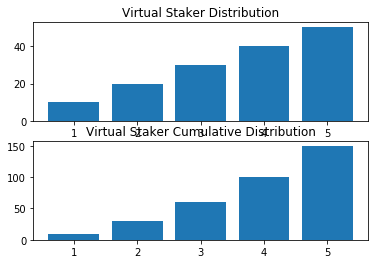

In [3]:
# Pre-processing Staker distributions
# Linear y = m * (x + 1) since indices start from 0
ticket_distribution = np.zeros(nodes) 

for i in range (0, nodes):
    ticket_distribution[i] =  10 * (i + 1) # m = 50 gives max y as 1000 which is 2% of 50000

x = np.linspace(1,nodes,nodes)
plt.subplot(2, 1, 1)
plt.bar(x, ticket_distribution)
plt.title("Virtual Staker Distribution")

cdf_L02=sc.create_cdf(nodes,ticket_distribution)
plt.subplot(2, 1, 2)
plt.bar(x, cdf_L02)
plt.title("Virtual Staker Cumulative Distribution")

In [4]:
beacon_model = model.Beacon_Model(nodes, ticket_distribution, 
                                  active_group_threshold, 
                                  group_size, 
                                  signature_threshold, 
                                  group_expiry, 
                                  group_formation_threshold, 
                                  node_failure_percent, 
                                  node_death_percent, 
                                  signature_delay
                                 )

In [5]:
active_group_size = []
signature_failures = []
for i in range (200):
    beacon_model.step()
    active_group_size.append(len(beacon_model.active_groups))
    print("signature failure events")
    print(beacon_model.unsuccessful_signature_events)
    

step # = 0
refreshing active nodes list
Number of nodes in the forked state = 0
bootstrapping active groups
number of active groups = 0
relay request recieved? = False
     No relay request
signature failure events
[]
step # = 1
refreshing active nodes list
Number of nodes in the forked state = 0
bootstrapping active groups
number of active groups = 0
relay request recieved? = True
     selecting group at random
low >= high
     no active groups available
     registering new group
             Not enough nodes to register a group
signature failure events
[]
step # = 2
refreshing active nodes list
Number of nodes in the forked state = 1
bootstrapping active groups
number of active groups = 0
relay request recieved? = True
     selecting group at random
low >= high
     no active groups available
     registering new group
             Not enough nodes to register a group
signature failure events
[]
step # = 3
refreshing active nodes list
Number of nodes in the forked state = 4
bootstra

group ID 6status = Expiredsteps to expiry = -47
group ID 7status = Expiredsteps to expiry = -45
group ID 8status = Expiredsteps to expiry = -43
group ID 9status = Expiredsteps to expiry = -36
group ID 10status = Expiredsteps to expiry = -35
group ID 11status = Expiredsteps to expiry = -34
group ID 12status = Expiredsteps to expiry = -30
group ID 13status = Expiredsteps to expiry = -26
group ID 14status = Expiredsteps to expiry = -23
group ID 15status = Expiredsteps to expiry = -20
group ID 16status = Expiredsteps to expiry = -15
group ID 17status = Expiredsteps to expiry = -10
group ID 18status = Expiredsteps to expiry = -1
group ID 19status = Expiredsteps to expiry = 0
group ID 20status = Activesteps to expiry = 4
relay request recieved? = False
     No relay request
     Checking for active nodes in randomly selected group
2.0
         signature unsuccessful
signature failure events
[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

group ID 10status = Expiredsteps to expiry = -89
group ID 11status = Expiredsteps to expiry = -88
group ID 12status = Expiredsteps to expiry = -84
group ID 13status = Expiredsteps to expiry = -80
group ID 14status = Expiredsteps to expiry = -77
group ID 15status = Expiredsteps to expiry = -74
group ID 16status = Expiredsteps to expiry = -69
group ID 17status = Expiredsteps to expiry = -64
group ID 18status = Expiredsteps to expiry = -55
group ID 19status = Expiredsteps to expiry = -54
group ID 20status = Expiredsteps to expiry = -50
group ID 21status = Expiredsteps to expiry = -39
group ID 22status = Expiredsteps to expiry = -35
group ID 23status = Expiredsteps to expiry = -29
group ID 24status = Expiredsteps to expiry = -25
group ID 25status = Expiredsteps to expiry = -20
group ID 26status = Expiredsteps to expiry = -17
group ID 27status = Expiredsteps to expiry = -16
group ID 28status = Expiredsteps to expiry = -14
group ID 29status = Expiredsteps to expiry = -13
group ID 30status = 

group ID 13status = Expiredsteps to expiry = -126
group ID 14status = Expiredsteps to expiry = -123
group ID 15status = Expiredsteps to expiry = -120
group ID 16status = Expiredsteps to expiry = -115
group ID 17status = Expiredsteps to expiry = -110
group ID 18status = Expiredsteps to expiry = -101
group ID 19status = Expiredsteps to expiry = -100
group ID 20status = Expiredsteps to expiry = -96
group ID 21status = Expiredsteps to expiry = -85
group ID 22status = Expiredsteps to expiry = -81
group ID 23status = Expiredsteps to expiry = -75
group ID 24status = Expiredsteps to expiry = -71
group ID 25status = Expiredsteps to expiry = -66
group ID 26status = Expiredsteps to expiry = -63
group ID 27status = Expiredsteps to expiry = -62
group ID 28status = Expiredsteps to expiry = -60
group ID 29status = Expiredsteps to expiry = -59
group ID 30status = Expiredsteps to expiry = -50
group ID 31status = Expiredsteps to expiry = -49
group ID 32status = Expiredsteps to expiry = -48
group ID 33st

signature failure events
[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
step # = 193
refreshing active nodes list
Number of nodes in the forked state = 3
number of active groups = 2
group ID 0status = Expiredsteps to expiry = -180
group ID 1status = Expiredsteps to expiry = -180
group ID 2status = Expiredsteps to expiry = -180
group ID 3status = Expiredsteps to expiry = -180
group ID 4status = Expiredsteps to expiry = -178
group ID 5status = Expiredsteps to expiry = -177
group ID 6status = Expiredsteps to expiry = -176
group ID 7status = Expiredsteps to expiry = -174
group ID 8status = Expiredsteps to expiry = -172
group ID 9status = Expiredsteps to expiry = -165
group ID 10status = Expiredsteps to expiry = -164
group ID 11status = Expiredsteps to expiry = -163
group I

2.0


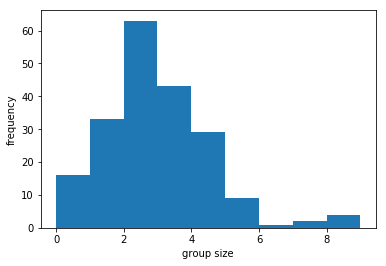

In [6]:
plt.hist(active_group_size, bins=range(max(active_group_size)+1))
plt.xlabel("group size")
plt.ylabel("frequency")
print(np.median(active_group_size))

Text(0, 0.5, 'active groups')

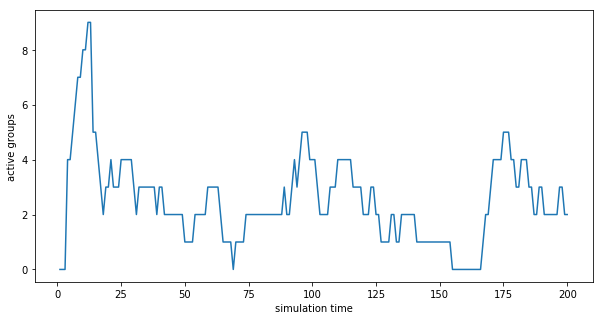

In [7]:
plt.figure(figsize = (10,5))
plt.plot(np.linspace(1,len(active_group_size),len(active_group_size)),active_group_size)
plt.xlabel("simulation time")
plt.ylabel("active groups")

Text(0, 0.5, 'Signature failure events')

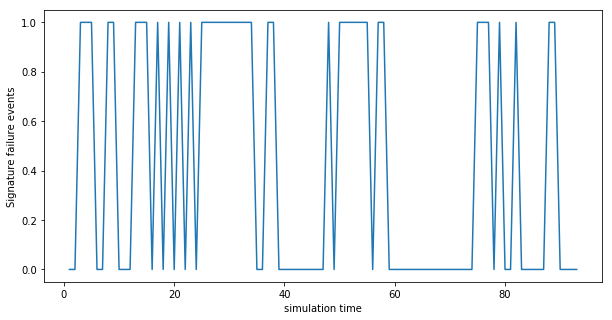

In [8]:
plt.figure(figsize = (10,5))
plt.plot(np.linspace(1,len(beacon_model.unsuccessful_signature_events),
                     len(beacon_model.unsuccessful_signature_events)),
                     beacon_model.unsuccessful_signature_events)
plt.xlabel("simulation time")
plt.ylabel("Signature failure events")

In [9]:
for group in beacon_model.schedule.agents:
    if group.type == "group":
        print(group.ownership_distr)

[0. 0. 2. 2. 2.]
[2. 0. 1. 0. 3.]
[0. 0. 0. 4. 2.]
[0. 0. 2. 1. 3.]
[0. 0. 0. 2. 4.]
[0. 0. 1. 0. 5.]
[0. 0. 2. 4. 0.]
[0. 0. 3. 1. 2.]
[0. 2. 4. 0. 0.]
[1. 0. 1. 4. 0.]
[0. 0. 0. 2. 4.]
[0. 0. 1. 0. 5.]
[0. 3. 0. 3. 0.]
[3. 0. 1. 2. 0.]
[0. 1. 0. 1. 4.]
[0. 3. 0. 3. 0.]
[0. 1. 0. 5. 0.]
[0. 0. 4. 2. 0.]
[0. 0. 0. 6. 0.]
[1. 0. 0. 4. 1.]
[0. 0. 0. 3. 3.]
[0. 1. 3. 2. 0.]
[0. 0. 2. 2. 2.]
[1. 0. 3. 2. 0.]
[1. 1. 2. 2. 0.]
[0. 0. 3. 0. 3.]
[0. 0. 0. 4. 2.]
[2. 0. 0. 4. 0.]
[0. 1. 1. 0. 4.]
[0. 4. 2. 0. 0.]
[1. 2. 0. 3. 0.]
[0. 2. 2. 0. 2.]
[0. 1. 3. 2. 0.]
[0. 1. 1. 1. 3.]
[0. 0. 1. 2. 3.]
[0. 0. 1. 2. 3.]
[1. 1. 0. 0. 4.]
[0. 0. 4. 0. 2.]
[0. 1. 0. 4. 1.]
[1. 1. 1. 3. 0.]
[1. 0. 0. 2. 3.]
[1. 0. 0. 3. 2.]
[0. 0. 0. 3. 3.]
[3. 0. 2. 0. 1.]
[0. 0. 3. 1. 2.]
[0. 1. 3. 2. 0.]
[3. 0. 0. 3. 0.]
[2. 2. 2. 0. 0.]
[2. 1. 3. 0. 0.]
[0. 1. 4. 1. 0.]
[0. 3. 1. 0. 2.]


In [12]:
for signature in beacon_model.schedule.agents:
    if signature.type == "signature":
        print(signature.type)
        print(signature.ownership_distr)

signature
[0. 0. 2. 2. 2.]
signature
[0. 0. 2. 2. 2.]
signature
[0. 0. 0. 2. 4.]
signature
[0. 0. 0. 4. 2.]
signature
[0. 0. 2. 4. 0.]
signature
[0. 0. 2. 4. 0.]
signature
[0. 0. 2. 1. 3.]
signature
[2. 0. 1. 0. 3.]
signature
[0. 2. 4. 0. 0.]
signature
[0. 0. 3. 1. 2.]
signature
[0. 0. 3. 1. 2.]
signature
[0. 2. 4. 0. 0.]
signature
[1. 0. 1. 4. 0.]
signature
[0. 0. 0. 2. 4.]
signature
[0. 0. 1. 0. 5.]
signature
[1. 0. 1. 4. 0.]
signature
[0. 0. 1. 0. 5.]
signature
[0. 0. 1. 0. 5.]
signature
[3. 0. 1. 2. 0.]
signature
[3. 0. 1. 2. 0.]
signature
[0. 3. 0. 3. 0.]
signature
[3. 0. 1. 2. 0.]
signature
[0. 3. 0. 3. 0.]
signature
[0. 1. 0. 1. 4.]
signature
[0. 1. 0. 5. 0.]
signature
[0. 3. 0. 3. 0.]
signature
[0. 3. 0. 3. 0.]
signature
[0. 1. 0. 5. 0.]
signature
[0. 0. 4. 2. 0.]
signature
[0. 1. 0. 5. 0.]
signature
[0. 0. 4. 2. 0.]
signature
[0. 0. 4. 2. 0.]
signature
[0. 0. 4. 2. 0.]
signature
[0. 0. 0. 6. 0.]
signature
[1. 0. 0. 4. 1.]
signature
[1. 0. 0. 4. 1.]
signature
[0. 0. 0. 3. 3.]
s